In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Downloading NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
# Cleaning the texts
corpus = []
ps = PorterStemmer()
for review in dataset['Review']:
    cleaned_review = re.sub('[^a-zA-Z]', ' ', review).lower().split()
    cleaned_review = ' '.join([ps.stem(word) for word in cleaned_review if word not in stopwords.words('english')])
    corpus.append(cleaned_review)

In [5]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset['Liked'].values

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
# Using MultinomialNB for better text classification performance
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Confusion Matrix:
 [[72 24]
 [27 77]]
Accuracy: 74.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        96
           1       0.76      0.74      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



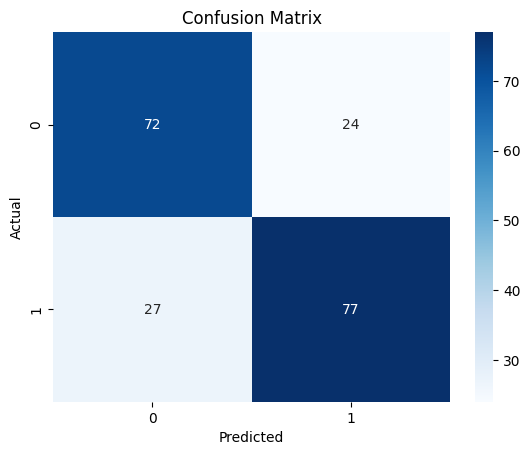

In [10]:
# Visualizing Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()